# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Starbucks-Capstone-Challenge" data-toc-modified-id="Starbucks-Capstone-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Starbucks Capstone Challenge</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Final-Advice" data-toc-modified-id="Final-Advice-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Final Advice</a></span></li></ul></li></ul></li><li><span><a href="#Data-Sets" data-toc-modified-id="Data-Sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Sets</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Portfolio-Data" data-toc-modified-id="Portfolio-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Portfolio Data</a></span><ul class="toc-item"><li><span><a href="#Clean-data" data-toc-modified-id="Clean-data-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Clean data</a></span></li><li><span><a href="#Portfolio-EDA" data-toc-modified-id="Portfolio-EDA-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Portfolio EDA</a></span></li></ul></li><li><span><a href="#Profile-Data" data-toc-modified-id="Profile-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Profile Data</a></span><ul class="toc-item"><li><span><a href="#Inspect-missing-value" data-toc-modified-id="Inspect-missing-value-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Inspect missing value</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Profile-EDA" data-toc-modified-id="Profile-EDA-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Profile EDA</a></span></li></ul></li><li><span><a href="#Transcript" data-toc-modified-id="Transcript-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Transcript</a></span><ul class="toc-item"><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Transform Data</a></span></li></ul></li><li><span><a href="#Combine-Data" data-toc-modified-id="Combine-Data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Combine Data</a></span><ul class="toc-item"><li><span><a href="#Combine-data" data-toc-modified-id="Combine-data-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Combine data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4.4.3"><span class="toc-item-num">4.4.3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#correlation" data-toc-modified-id="correlation-4.4.3.1"><span class="toc-item-num">4.4.3.1&nbsp;&nbsp;</span>correlation</a></span></li><li><span><a href="#customer-demographic" data-toc-modified-id="customer-demographic-4.4.3.2"><span class="toc-item-num">4.4.3.2&nbsp;&nbsp;</span>customer demographic</a></span></li><li><span><a href="#offer-success-rate" data-toc-modified-id="offer-success-rate-4.4.3.3"><span class="toc-item-num">4.4.3.3&nbsp;&nbsp;</span>offer success rate</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build Model</a></span><ul class="toc-item"><li><span><a href="#Complication:" data-toc-modified-id="Complication:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Complication:</a></span></li><li><span><a href="#Model-Choose:" data-toc-modified-id="Model-Choose:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model Choose:</a></span></li><li><span><a href="#Prepare-Dataset" data-toc-modified-id="Prepare-Dataset-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Prepare Dataset</a></span><ul class="toc-item"><li><span><a href="#Build-model" data-toc-modified-id="Build-model-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Build model</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter" data-toc-modified-id="Hyperparameter-5.3.1.1"><span class="toc-item-num">5.3.1.1&nbsp;&nbsp;</span>Hyperparameter</a></span></li></ul></li></ul></li><li><span><a href="#Result" data-toc-modified-id="Result-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Possible-improvements" data-toc-modified-id="Possible-improvements-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Possible improvements</a></span></li></ul></li></ul></div>

# Problem Statement

My goal of this project is to build a prediction model to find out whether a customer will respond to a certain offer based on the simulation. The strategy for this project is to analyze data, implement algorithms, and analyze the results. 
1. Analyze data: I'll clean data and apply EDA on each single dataset as while as combined dataset.
2. Implement machine learning algorithm: I'll apply lightGBM machine learning algorithm and fine tune the prameter.


# EDA


In [27]:
import pandas as pd
import numpy as np
import math
import json
%matplotlib inline

import lighteda as le
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer,OneHotEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import helper

import lightgbm as lgb
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, f1_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
import re

## Portfolio Data

In [2]:
portfolio_raw = pd.read_json('../data/external/portfolio.json', orient='records', lines=True)
portfolio_raw.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


### Clean data

In [3]:
portfolio = helper.process_portfolio('../data/external/portfolio.json')

portfolio.head()

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [4]:
le.data_stats(portfolio)

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
0,reward,5,0.0,0.3,int64
1,difficulty,5,0.0,0.4,int64
2,duration,5,0.0,0.4,int64
3,offer_type,3,0.0,0.4,object
4,offer_id,10,0.0,0.1,object
5,email,1,0.0,1.0,int64
6,mobile,2,0.0,0.9,int64
7,social,2,0.0,0.6,int64
8,web,2,0.0,0.8,int64


### Portfolio EDA

In [6]:
portfolio_channal_df = helper.portfolio_channal(portfolio)
display(portfolio_channal_df)

,Total Email,Total Mobile,Total Social,Total Web
1,10,9,6,8


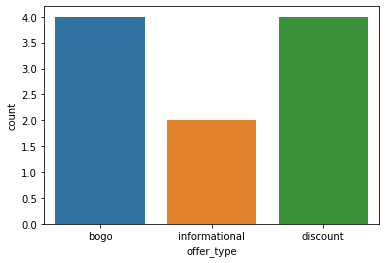

In [336]:
sns.countplot(x='offer_type',data=portfolio)

## Profile Data

In [3]:
profile = pd.read_json('../data/external/profile.json', orient='records', lines=True)
display(profile.head())
print(profile.shape)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


(17000, 5)


In [4]:
le.data_stats(profile)

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
0,gender,3,0.127941,0.499059,object
4,income,91,0.127941,0.127941,float64
1,age,85,0.000000,0.127941,int64
2,id,17000,0.000000,0.000059,object
3,became_member_on,1716,0.000000,0.002529,int64


In `gender` and `income` columns, there are 13% data missing. we need further analysis these missing value.

### Inspect missing value

In [5]:
print(profile.age.value_counts()[:5])
print(profile.gender.value_counts())

118    2175
58      408
53      372
51      363
54      359
Name: age, dtype: int64
M    8484
F    6129
O     212
Name: gender, dtype: int64


In [6]:
le.data_stats(profile[profile.age != 118])

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
0,gender,3,0.0,0.572277,object
1,age,84,0.0,0.027521,int64
2,id,14825,0.0,0.000067,object
3,became_member_on,1707,0.0,0.002631,int64
4,income,91,0.0,0.021180,float64


In [7]:
le.data_stats(profile[profile.age == 118])

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
0,gender,0,1.0,1.000000,object
4,income,0,1.0,1.000000,float64
1,age,1,0.0,1.000000,int64
2,id,2175,0.0,0.000460,object
3,became_member_on,950,0.0,0.005057,int64


There are 12.8% All missing value have age as 118. Therefore, we can filter out missing values.



### Clean Data

In [8]:
profile = helper.process_profile('../data/external/profile.json')

### Profile EDA

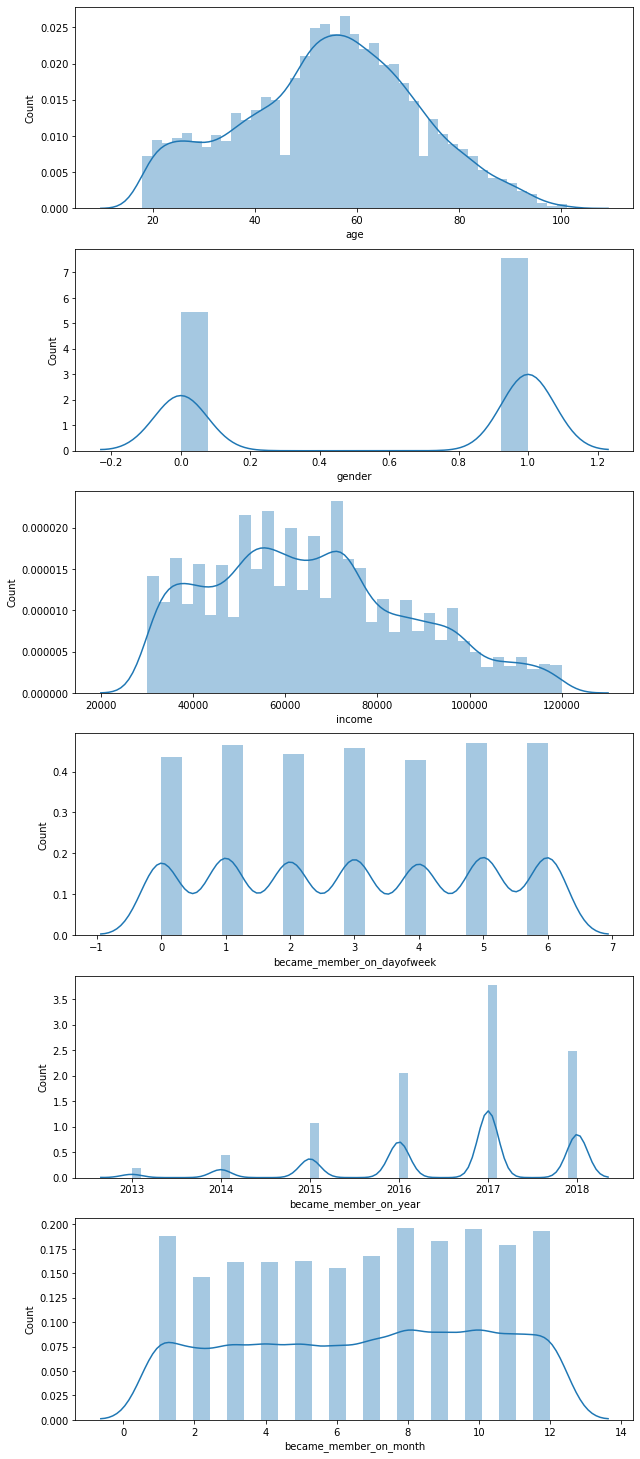

In [9]:
col_names = ['age', 'gender', 'income','became_member_on_dayofweek','became_member_on_year','became_member_on_month']
helper.plot_profile_col(col_names,profile)

From the graph we can find:
1. The distribution of the started week and month is even.
1. The number of type O gender is too small. Type O gender will not provide enough information in the model.

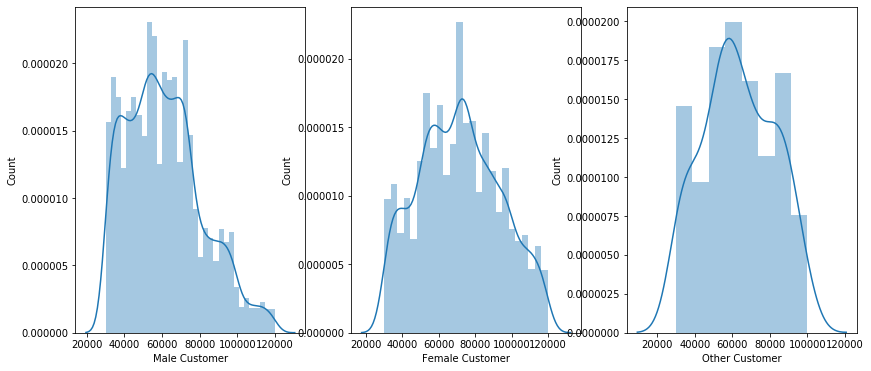

In [25]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

male_customers = profile[profile['gender'] == 1]
female_customers = profile[profile['gender'] == 0]
other_customers = profile[profile['gender'] == 2]

sns.distplot(male_customers['income'], hist=True, ax=ax[0]) 
ax[0].set_xlabel('Male Customer')
ax[0].set_ylabel('Count')
sns.distplot(female_customers['income'], hist=True, ax=ax[1]) 
ax[1].set_xlabel('Female Customer')
ax[1].set_ylabel('Count')
sns.distplot(other_customers['income'], hist=True, ax=ax[2]) 
ax[2].set_xlabel('Other Customer')
ax[2].set_ylabel('Count')

plt.show()

In [26]:
profile['gender'].value_counts()

1    8484
0    6129
2     212
Name: gender, dtype: int64

After a further analysis with the data, I decide to drop gender marked as 'O' to reduce the unbalance of data.

In [27]:
profile = profile[profile['gender']!=2]

## Transcript

In [28]:
transcript = pd.read_json('../data/external/transcript.json', orient='records', lines=True)

In [29]:
display(transcript.head())
print(transcript.shape)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


(306534, 4)


### Transform Data

In [30]:

# create a dataframe of the 3 individual value columns
values_df = pd.DataFrame(transcript.value.tolist())
values_df['offer id'].fillna(values_df['offer_id'],inplace=True)
values_df.drop('offer_id', axis=1,inplace=True)
values_df.rename(columns={"offer id": "offer_id"},inplace=True)

# concatenate the original dataframe with the new `offer_channels` dataframe
transcript = pd.concat([transcript, values_df], axis = 1)

# drop the original channels column from `portfolio`
transcript = transcript.drop('value',axis=1)

# change person to customer_id
transcript.rename(columns={"person": "customer_id"},inplace=True)

# change hour to day
transcript['time'] /= 24.0

# One hot encoding event column
offer_event =  pd.get_dummies(transcript['event'])
transcript = pd.concat([transcript, offer_event], axis = 1)
# transcript = transcript.drop('event',axis=1)
transcript.rename(columns={"offer received": "received",
                           "offer viewed":"viewed",
                           "offer completed":"completed"
                          },inplace=True)
transcript.head()

,customer_id,event,time,offer_id,amount,reward,completed,received,viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0.0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,0,1,0,0


In [31]:
le.data_stats(transcript)

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
5,reward,4,0.890456,0.890456,float64
4,amount,5103,0.546696,0.546696,float64
3,offer_id,10,0.453304,0.453304,object
0,customer_id,17000,0.000000,0.000166,object
1,event,4,0.000000,0.453304,object
2,time,120,0.000000,0.055557,float64
6,completed,2,0.000000,0.890456,uint8
7,received,2,0.000000,0.751163,uint8
8,viewed,2,0.000000,0.811685,uint8
9,transaction,2,0.000000,0.546696,uint8


There are more than 89% data for reward is missing and over half of the amount data is missing. It requires more analysis.

In [32]:
le.data_stats(transcript[transcript.event.isin(['offer received','offer viewed','offer completed'])])

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
4,amount,0,1.000000,1.000000,float64
5,reward,4,0.799625,0.799625,float64
0,customer_id,16994,0.000000,0.000107,object
1,event,3,0.000000,0.455165,object
2,time,120,0.000000,0.093298,float64
3,offer_id,10,0.000000,0.120783,object
6,completed,2,0.000000,0.799625,uint8
7,received,2,0.000000,0.544835,uint8
8,viewed,2,0.000000,0.655540,uint8
9,transaction,1,0.000000,1.000000,uint8


In [33]:
le.data_stats(transcript[transcript.event =='offer completed' ])

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
4,amount,0,1.0,1.000000,float64
0,customer_id,12774,0.0,0.000179,object
1,event,1,0.0,1.000000,object
2,time,120,0.0,0.020549,float64
3,offer_id,8,0.0,0.158343,object
5,reward,4,0.0,0.359451,float64
6,completed,1,0.0,1.000000,uint8
7,received,1,0.0,1.000000,uint8
8,viewed,1,0.0,1.000000,uint8
9,transaction,1,0.0,1.000000,uint8


In [34]:
le.data_stats(transcript[transcript.event =='transaction' ])

,Columns,Unique Values,% of Missing Values,% of Values in One Category,Data Type
3,offer_id,0,1.0,1.000000,object
5,reward,0,1.0,1.000000,float64
0,customer_id,16578,0.0,0.000259,object
1,event,1,0.0,1.000000,object
2,time,120,0.0,0.010997,float64
4,amount,5103,0.0,0.003102,float64
6,completed,1,0.0,1.000000,uint8
7,received,1,0.0,1.000000,uint8
8,viewed,1,0.0,1.000000,uint8
9,transaction,1,0.0,1.000000,uint8


We can find that:
1. the reward data only appears when event is 'offer complete'.
1. offer_id only appear when event is 'transaction'.

Thus, we can split the transcript into two dataset.

In [35]:
offer = transcript[transcript.event.isin(['offer received','offer viewed','offer completed'])][['event','offer_id','customer_id','time','received','viewed','completed']]
transaction = transcript[transcript.event =='transaction' ][['customer_id','time','amount']]

In [36]:
display(offer.head(2))
display(transaction.head(2))

,event,offer_id,customer_id,time,received,viewed,completed
0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,1,0,0
1,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,a03223e636434f42ac4c3df47e8bac43,0.0,1,0,0


,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56


In [56]:
transcript.groupby(['customer_id','offer_id']).agg({
                                                 'time':'last',
                                                  'received':'sum',
                                                  'viewed':'sum',
                                                  'completed':'sum'
                                                 })

time  \
customer_id                      offer_id                                  
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5  24.00   
                                 3f207df678b143eea3cee63160fa8bed  15.50   
                                 5a8bc65990b245e5a138643cd4eb9837   8.00   
                                 f19421c1d4aa40978ebb69ca19b0e20d  19.00   
                                 fafdcd668e3743c1bb461111dcafc2a4  22.50   
...                                                                  ...   
fffad4f4828548d1b5583907f2e9906b f19421c1d4aa40978ebb69ca19b0e20d  21.50   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7   8.25   
                                 2906b810c7d4411798c6938adc9daaa5  24.25   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9  22.25   
                                 fafdcd668e3743c1bb461111dcafc2a4   2.50   

                                                                   received  \
customer_id                      offer_id                                     
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5         1   
                                 3f207df678b143eea3cee63160fa8bed         1   
                                 5a8bc65990b245e5a138643cd4eb9837         1   
                                 f19421c1d4aa40978ebb69ca19b0e20d         1   
                                 fafdcd668e3743c1bb461111dcafc2a4         1   
...                                                                     ...   
fffad4f4828548d1b5583907f2e9906b f19421c1d4aa40978ebb69ca19b0e20d         2   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7         1   
                                 2906b810c7d4411798c6938adc9daaa5         3   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9         1   
                                 fafdcd668e3743c1bb461111dcafc2a4         1   

                                                                   viewed  \
customer_id                      offer_id                                   
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5       0   
                                 3f207df678b143eea3cee63160fa8bed       1   
                                 5a8bc65990b245e5a138643cd4eb9837       1   
                                 f19421c1d4aa40978ebb69ca19b0e20d       1   
                                 fafdcd668e3743c1bb461111dcafc2a4       1   
...                                                                   ...   
fffad4f4828548d1b5583907f2e9906b f19421c1d4aa40978ebb69ca19b0e20d       2   
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7       1   
                                 2906b810c7d4411798c6938adc9daaa5       3   
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9       1   
                                 fafdcd668e3743c1bb461111dcafc2a4       1   

                                                                   completed  
customer_id                      offer_id                                     
0009655768c64bdeb2e877511632db8f 2906b810c7d4411798c6938adc9daaa5          1  
                                 3f207df678b143eea3cee63160fa8bed          0  
                                 5a8bc65990b245e5a138643cd4eb9837          0  
                                 f19421c1d4aa40978ebb69ca19b0e20d          1  
                                 fafdcd668e3743c1bb461111dcafc2a4          1  
...                                                                      ...  
fffad4f4828548d1b5583907f2e9906b f19421c1d4aa40978ebb69ca19b0e20d          2  
ffff82501cea40309d5fdd7edcca4a07 0b1e1539f2cc45b7b9fa7c272da2e1d7          1  
                                 2906b810c7d4411798c6938adc9daaa5          3  
                                 9b98b8c7a33c4b65b9aebfe6a799e6d9          1  
                                 fafdcd668e3743c1bb461111dcafc2a4          1  

[63288 rows x 4 colum

## Combine Data

### Combine data

In [8]:
# Read and process data
portfolio = helper.process_portfolio('../data/external/portfolio.json')
profile = helper.process_profile('../data/external/profile.json')
offer,transaction = helper.process_transcript('../data/external/transcript.json')

In [9]:
# Check dataset
display(portfolio.head(1))
display(profile.head(1))
display(offer.head(1))
display(transaction.head(1))

,reward,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0


,gender,age,customer_id,became_member_on,income,became_member_on_dayofweek,became_member_on_year,became_member_on_month,10's,20's,30's,40's,50's,60's,70's,80's,90's,100's
1,0,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5,2017,7,0,0,0,0,1,0,0,0,0,0


,event,offer_id,customer_id,time,received,viewed,completed
0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,1,0,0


,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.0,0.83


We care more about whether the offer was successful. Therefore we only combin offer, portfolio, and profile data.

In [10]:
merge_df_1 = pd.merge(offer,portfolio,how='inner',on = 'offer_id')
merge_df = pd.merge(merge_df_1,profile,how='inner',on = 'customer_id')

In [11]:
merge_df.shape

(146615, 32)

In [12]:
merge_df.head()

,event,offer_id,customer_id,time,received,viewed,completed,reward,difficulty,duration,...,10's,20's,30's,40's,50's,60's,70's,80's,90's,100's
0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.00,1,0,0,5,5,7,...,0,0,0,0,0,0,1,0,0,0
1,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.25,0,1,0,5,5,7,...,0,0,0,0,0,0,1,0,0,0
2,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,5.50,0,0,1,5,5,7,...,0,0,0,0,0,0,1,0,0,0
3,offer received,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.00,1,0,0,5,5,5,...,0,0,0,0,0,0,1,0,0,0
4,offer completed,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.25,0,0,1,5,5,5,...,0,0,0,0,0,0,1,0,0,0


In [13]:
received = merge_df[merge_df.event == 'offer received']
viewed = merge_df[merge_df.event == 'offer viewed']
completed = merge_df[merge_df.event == 'offer completed']

### Feature Engineering

In [ ]:
received_processed = helper.fe_combined(received,viewed,completed)


In [18]:
received_processed.head()

,Unnamed: 0,Unnamed: 0.1,event,offer_id,customer_id,time,received,viewed,completed,reward,...,70's,80's,90's,100's,expected_finish,offer_completed,finish_time,offer_viewed,view_time,success
0,0,0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,1,0,0,5,...,1,0,0,0,7.0,1,5.50,1,0.25,1
1,1,1,offer received,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.0,1,0,0,5,...,1,0,0,0,26.0,1,21.25,1,24.25,1
2,2,2,offer received,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,17.0,1,0,0,10,...,1,0,0,0,24.0,1,21.25,1,17.00,1
3,3,3,offer received,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,7.0,1,0,0,0,...,1,0,0,0,10.0,0,10.00,1,9.00,0
4,4,4,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,ebe7ef46ea6f4963a7dd49f501b26779,0.0,1,0,0,5,...,0,0,0,0,7.0,0,7.00,0,NaN,0


In [19]:
received_processed.to_csv('../data/processed/received_processed.csv')

### EDA
#### correlation

In [20]:
received_processed = pd.read_csv('../data/processed/received_processed.csv')

In [21]:
corr = received_processed.corr()

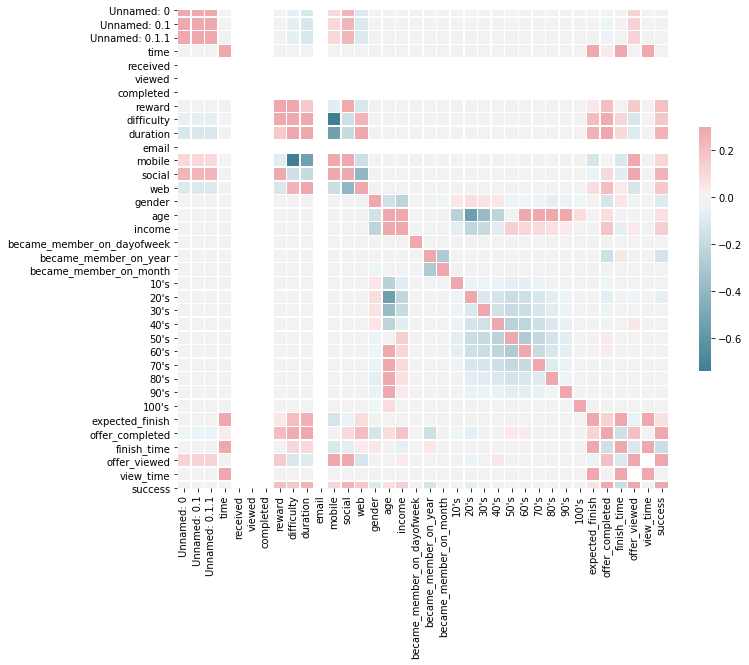

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### customer demographic

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

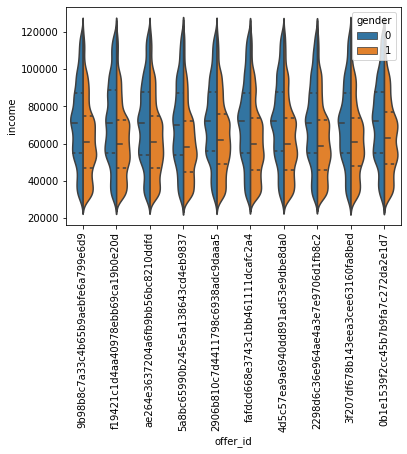

In [23]:
sns.violinplot(x='offer_id',y='income',data = merge_df[merge_df['gender'] != 2],split=True,hue="gender",inner="quartile")
plt.xticks(rotation=90)

#### offer success rate

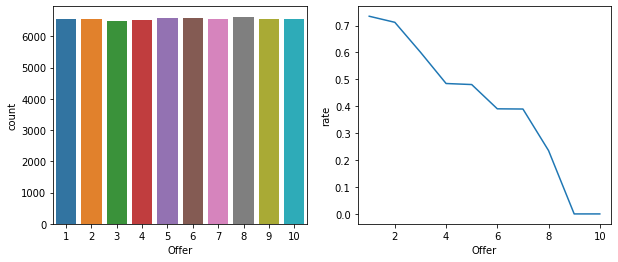

In [26]:
helper.success_plot(received_processed,portfolio)

# Build Model

## Complication:

There are many complications in this project to build models for those data sets. The datasets have a few categorical features with high cardinality, which tradition one hot encoding method will create a wide and imbalanced dataset. Moreover, there are a few numerical features. For a traditional tree model, it could be very slow to find the split.

## Model Choose:

LightGBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. There are several reasons to choose LightGBM as the model to predict the offer success.
LightGBM is a gradient boosting framework based on tree algorithms.
It has a faster training speed.
It works great for the dataset contains many categorical data.
Implementation
To properly apply train lightGBM, we need to tell which feature is categorical data. We also need to drop off some data to represent how real the situation is. For example, we need to drop complete and view flags. Also, we need fine-tune the parameter to optimize the result.


## Prepare Dataset

In [10]:
received_processed = pd.read_csv('../data/processed/received_processed.csv')

In [11]:
received_processed['diff_time'] = received_processed['finish_time'] - received_processed['time']

In [12]:
received_processed

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,event,offer_id,customer_id,time,received,viewed,completed,...,80's,90's,100's,expected_finish,offer_completed,finish_time,offer_viewed,view_time,success,diff_time
0,0,0,0,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,1,0,0,...,0,0,0,7.0,1,5.50,1,0.25,1,5.50
1,1,1,1,offer received,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.0,1,0,0,...,0,0,0,26.0,1,21.25,1,24.25,1,0.25
2,2,2,2,offer received,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,17.0,1,0,0,...,0,0,0,24.0,1,21.25,1,17.00,1,4.25
3,3,3,3,offer received,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,7.0,1,0,0,...,0,0,0,10.0,0,10.00,1,9.00,0,3.00
4,4,4,4,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,ebe7ef46ea6f4963a7dd49f501b26779,0.0,1,0,0,...,0,0,0,7.0,0,7.00,0,NaN,0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65580,65580,65580,65580,offer received,5a8bc65990b245e5a138643cd4eb9837,838772a672304524a86cf9b465b9bd5d,14.0,1,0,0,...,0,0,0,17.0,0,17.00,1,14.75,0,3.00
65581,65581,65581,65581,offer received,5a8bc65990b245e5a138643cd4eb9837,838772a672304524a86cf9b465b9bd5d,17.0,1,0,0,...,0,0,0,20.0,0,20.00,1,17.00,0,3.00
65582,65582,65582,65582,offer received,5a8bc65990b245e5a138643cd4eb9837,d1f3cc62def540c8951561f6da22e88a,17.0,1,0,0,...,0,0,0,20.0,0,20.00,1,19.25,0,3.00
65583,65583,65583,65583,offer received,5a8bc65990b245e5a138643cd4eb9837,d1f3cc62def540c8951561f6da22e88a,21.0,1,0,0,...,0,0,0,24.0,0,24.00,1,23.25,0,3.00


In [13]:
feature_col = ['event', 'offer_id', 'time', 'reward', 'difficulty', 
                             'duration', 'offer_type', 'email',
                               'mobile', 'social', 'web', 'gender', 'age',
                               'income', 'became_member_on_dayofweek', 'became_member_on_year',
                               'became_member_on_month', 'expected_finish', 'view_time']

In [14]:
target = received_processed['success']
feature = received_processed[feature_col]

In [15]:
dtype={'event':'category',
       'offer_id':'category',
       'time':'float64',
       'reward':'category',
       'difficulty':'category',
       'duration':'float64',
       'offer_type':'category',
       'email':'category',
       'mobile':'category',
       'social':'category',
       'web':'category',
       'gender':'category',
       'age':'int64',
       'income':'float64',
       'became_member_on_dayofweek':'category',
       'became_member_on_year':'category',
       'became_member_on_month':'category',
       'expected_finish':'float64',
       'view_time':'float64'
      }

In [20]:
feature = feature.astype(dtype)
target = target.astype('bool')
categorical_features = [key  for (key, value) in dtype.items() if value == 'category']
numrical_col = ['time','duration','age','income','expected_finish','view_time']

In [21]:
mm_scaler = MinMaxScaler()
feature[numrical_col] = mm_scaler.fit_transform(feature[numrical_col])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42, stratify=target)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)


### Build model

In [23]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
val_data = lgb.Dataset(X_val, label=y_val)

To tune the parameters, I first lower the learning_rate to improve the accuracy of the model and also set up evaluation metrics. I choose Gradient Boosting Decision Tree (gbdt) as boosting method. I also set feature_fraction to 0.9 to ask LightGBM randomly select 90% of features before training to reduce overfitting. 

#### Hyperparameter

In [24]:
param = {'objective':'regression',
         "boosting": "gbdt",
         "metric": ['auc'],
         "random_state": 42}

In [31]:
gridParams = {
    "learning_rate": [0.01,0.1],
    "feature_fraction":[0.9],
    "bagging_fraction": [0.9], 
    "bagging_seed": [11],
    }

In [32]:
mdl = lgb.LGBMClassifier(
          boosting_type= param['boosting'],
          objective = param['objective'],
          metric = param['metric'],
          )

In [33]:
scoring = {'AUC': 'roc_auc'}
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='AUC')

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      metric=['auc'], min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='regression', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid=

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'bagging_fraction': 0.9, 'bagging_seed': 11, 'feature_fraction': 0.9, 'learning_rate': 0.1}
0.9331271894602463


We find the best combination of the parameter via grid search. We can use it for the final model.

In [ ]:
param = {'objective':'regression',
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": ['auc'],
         "random_state": 42}

In [498]:
model = lgb.train(param,
                 train_data,
                 valid_sets=val_data,
                 num_boost_round=5000,
                 early_stopping_rounds=1000,
                 verbose_eval=100,
                 feval=lgb_f1_score, 
                evals_result=evals_result
                 )

Training until validation scores don't improve for 1000 rounds


/home/johnny/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[100]	valid_0's auc: 0.930014	valid_0's f1: 0.799763
[200]	valid_0's auc: 0.931224	valid_0's f1: 0.809697
[300]	valid_0's auc: 0.931848	valid_0's f1: 0.813521
[400]	valid_0's auc: 0.932203	valid_0's f1: 0.816331
[500]	valid_0's auc: 0.93234	valid_0's f1: 0.816101
[600]	valid_0's auc: 0.932307	valid_0's f1: 0.816809
[700]	valid_0's auc: 0.932315	valid_0's f1: 0.815532
[800]	valid_0's auc: 0.932343	valid_0's f1: 0.815941
[900]	valid_0's auc: 0.932383	valid_0's f1: 0.816175
[1000]	valid_0's auc: 0.932375	valid_0's f1: 0.815374
[1100]	valid_0's auc: 0.93243	valid_0's f1: 0.815508
[1200]	valid_0's auc: 0.932469	valid_0's f1: 0.815558
[1300]	valid_0's auc: 0.932444	valid_0's f1: 0.816
[1400]	valid_0's auc: 0.932448	valid_0's f1: 0.815899
[1500]	valid_0's auc: 0.932516	valid_0's f1: 0.816483
[1600]	valid_0's auc: 0.93249	valid_0's f1: 0.815099
[1700]	valid_0's auc: 0.93247	valid_0's f1: 0.815048
[1800]	valid_0's auc: 0.93253	valid_0's f1: 0.814423
Early stopping, best iteration is:
[844]	vali

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.935


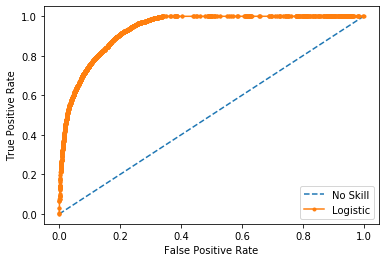

In [505]:
n_probs = [0 for _ in range(len(y_test))]
predsTest = model.predict(X_test, num_iteration=model.best_iteration)
ns_auc = roc_auc_score(y_test, n_probs)
lr_auc = roc_auc_score(y_test, predsTest)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, n_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predsTest)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [499]:
predsValid = model.predict(X_val, num_iteration=model.best_iteration)
predsTrain = model.predict(X_train, num_iteration=model.best_iteration)
predsTest = model.predict(X_test, num_iteration=model.best_iteration)

In [510]:
print('The f1 score for valdation prediction is:', f1_score( y_val, np.round(predsValid)))
print('The f1 score for train prediction is:', f1_score(y_train, np.round(predsTrain) ))
print('The f1 score for test prediction is:', f1_score(y_test, np.round(predsTest)))

The f1 score for valdation prediction is: 0.8172406031960388
The f1 score for train prediction is: 0.8423620457604306
The f1 score for test prediction is: 0.8175287356321839


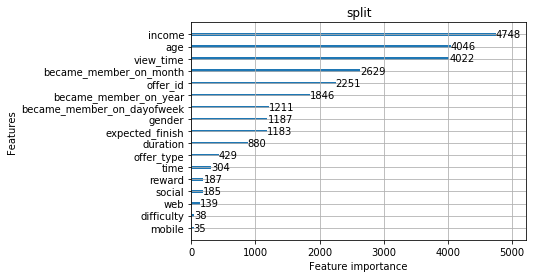

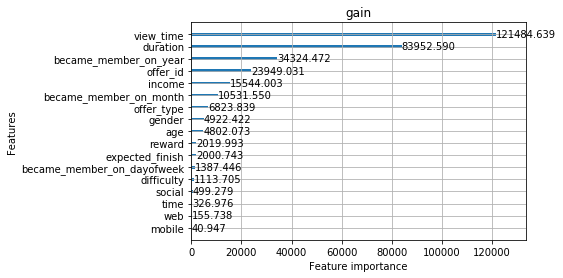

[   0 2251  304  187   38  880  429    0   35  185  139 1187 4046 4748
 1211 1846 2629 1183 4022]
[0.00000000e+00 2.39490310e+04 3.26976012e+02 2.01999270e+03
 1.11370475e+03 8.39525904e+04 6.82383869e+03 0.00000000e+00
 4.09465741e+01 4.99279404e+02 1.55737853e+02 4.92242182e+03
 4.80207326e+03 1.55440029e+04 1.38744572e+03 3.43244719e+04
 1.05315503e+04 2.00074318e+03 1.21484639e+05]


In [511]:
# Plot importance
lgb.plot_importance(model, importance_type="split", title="split")
plt.show()

lgb.plot_importance(model, importance_type="gain", title='gain')
plt.show()

# Importance values are also available in:
print(model.feature_importance("split"))
print(model.feature_importance("gain"))

## Result

My goal of this project is to build a predict model to find out whether a customer will respond to an certain offer based on the simulated. The model I choose is LighGBM and the result is great. After several round of tunning the result of RMSE for test data reaches 0.000556 and the log_loss is lower than 0.000166.
From the model we can tell that the top 5 important features for split are:
1. Customers' income
2. Age
3. Offer view time

the top 3 important features for gain are:
1. Offer view time
2. Duration
3. The year become a member

## Possible improvements
To further improve the model performance, Starbucks can think about enriching the raw data by collecting more customer demographics data, including customer education level, location of Starbucks they purchased, and frequency of purchase. Additional info would allow the company to have better insights into different customer sections, and also provide offers which are most attractive to the customer.

# Conclusion
From the model and prediction result, we can learn that view_time, duration and year when they become member are key influencing factors for customers’ purchase decision. Once a customer viewed his offer, he/she will have a higher probability of making the transaction.
